# Task -1 : Preprocessing and Exploring the Data

In [22]:
%load_ext autoreload
%autoreload 2
import sys
import os
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import numpy as np
import seaborn as sns
sys.path.append('..')

from src.data_loader import data_loader


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1.Extract Historical Financial Data

call the data loader function

In [2]:
df = data_loader()


[*********************100%***********************]  3 of 3 completed


Data loaded, cleaned, and saved successfully.


In [8]:
df.head()

Ticker,BND,SPY,TSLA
Date,,,
2015-01-02,60.385975,170.589584,14.620667
2015-01-05,60.561306,167.508820,14.006000
2015-01-06,60.736691,165.931107,14.085333
2015-01-07,60.773193,167.998718,14.063333
2015-01-08,60.678219,170.979904,14.041333


In [9]:
df.info()

<class 'pandas.DataFrame'>
DatetimeIndex: 2775 entries, 2015-01-02 to 2026-01-14
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BND     2775 non-null   float64
 1   SPY     2775 non-null   float64
 2   TSLA    2775 non-null   float64
dtypes: float64(3)
memory usage: 86.7 KB


In [10]:
df.isnull().sum()

Ticker
BND     0
SPY     0
TSLA    0
dtype: int64

In [3]:
print(df.describe())

Ticker          BND          SPY         TSLA
count   2775.000000  2775.000000  2775.000000
mean      67.325729   339.074725   138.472937
std        4.685294   141.925744   131.682073
min       59.698601   154.980850     9.578000
25%       63.436459   219.599655    17.851666
50%       66.492096   301.538544    91.625999
75%       71.237347   423.938507   242.028336
max       76.068115   695.159973   489.880005


In [4]:
returns = df.pct_change().dropna()

## 3.Conduct Exploratory Data Analysis (EDA)

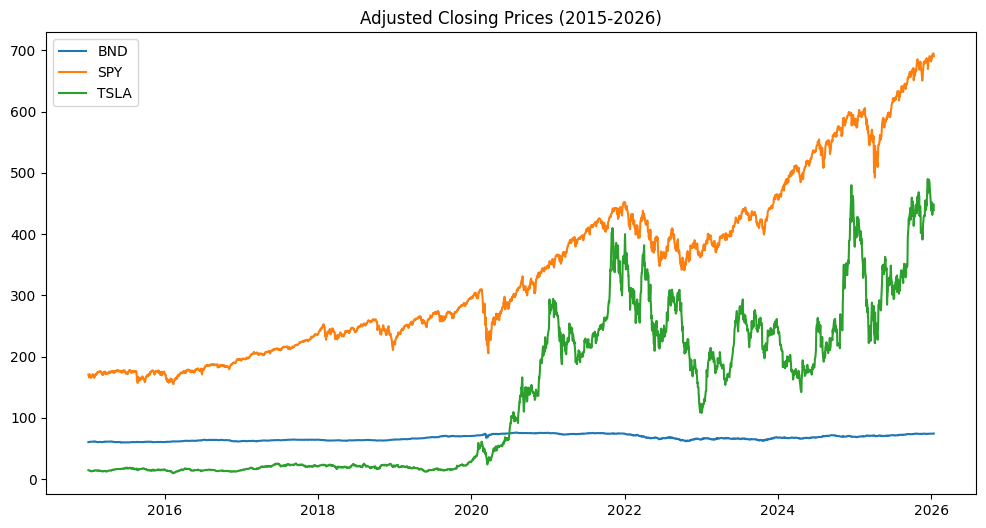

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(df)
plt.title('Adjusted Closing Prices (2015-2026)')
plt.legend(df.columns)
plt.show()



 Identifying Specific Anomaly Days (Outliers)

In [14]:

for ticker in returns.columns:
    print(f"\n--- {ticker} Significant Anomalies ---")
    mean = returns[ticker].mean()
    std = returns[ticker].std()
    high_returns = returns[returns[ticker] > (mean + 3 * std)][ticker]
    low_returns = returns[returns[ticker] < (mean - 3 * std)][ticker]
    
    print(f"Number of unusually HIGH return days: {len(high_returns)}")
    print(f"Top 3 Highs:\n{high_returns.nlargest(3)}")
    
    print(f"\nNumber of unusually LOW return days: {len(low_returns)}")
    print(f"Top 3 Lows:\n{low_returns.nsmallest(3)}")


--- BND Significant Anomalies ---
Number of unusually HIGH return days: 15
Top 3 Highs:
Date
2020-03-13    0.042201
2020-03-23    0.022149
2022-11-10    0.020702
Name: BND, dtype: float64

Number of unusually LOW return days: 17
Top 3 Lows:
Date
2020-03-12   -0.054385
2020-03-18   -0.024140
2020-03-17   -0.020685
Name: BND, dtype: float64

--- SPY Significant Anomalies ---
Number of unusually HIGH return days: 12
Top 3 Highs:
Date
2025-04-09    0.105019
2020-03-24    0.090603
2020-03-13    0.085486
Name: SPY, dtype: float64

Number of unusually LOW return days: 27
Top 3 Lows:
Date
2020-03-16   -0.109424
2020-03-12   -0.095677
2020-03-09   -0.078094
Name: SPY, dtype: float64

--- TSLA Significant Anomalies ---
Number of unusually HIGH return days: 25
Top 3 Highs:
Date
2025-04-09    0.226900
2024-10-24    0.219190
2020-02-03    0.198949
Name: TSLA, dtype: float64

Number of unusually LOW return days: 19
Top 3 Lows:
Date
2020-09-08   -0.210628
2020-03-16   -0.185778
2020-02-05   -0.17175

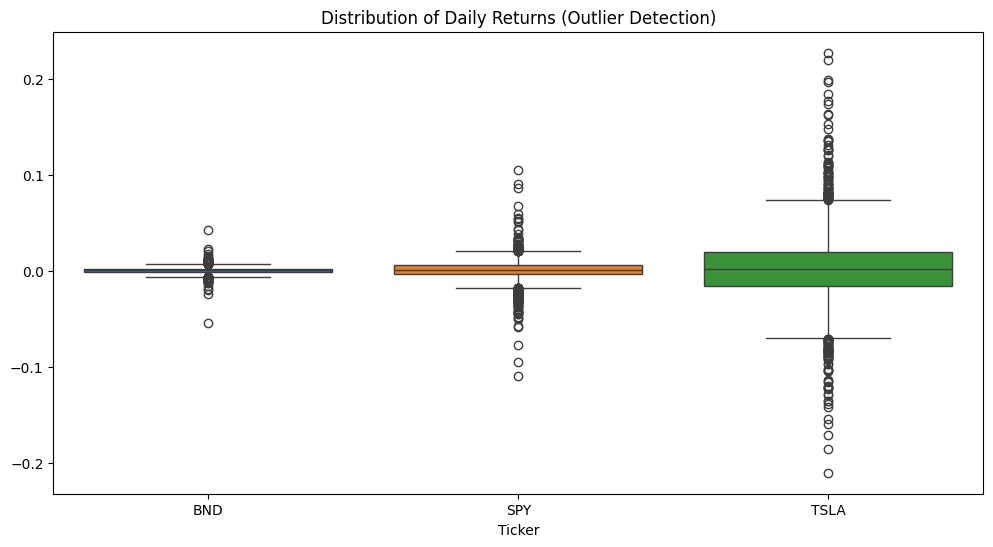

In [6]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=returns)
plt.title('Distribution of Daily Returns (Outlier Detection)')
plt.show()



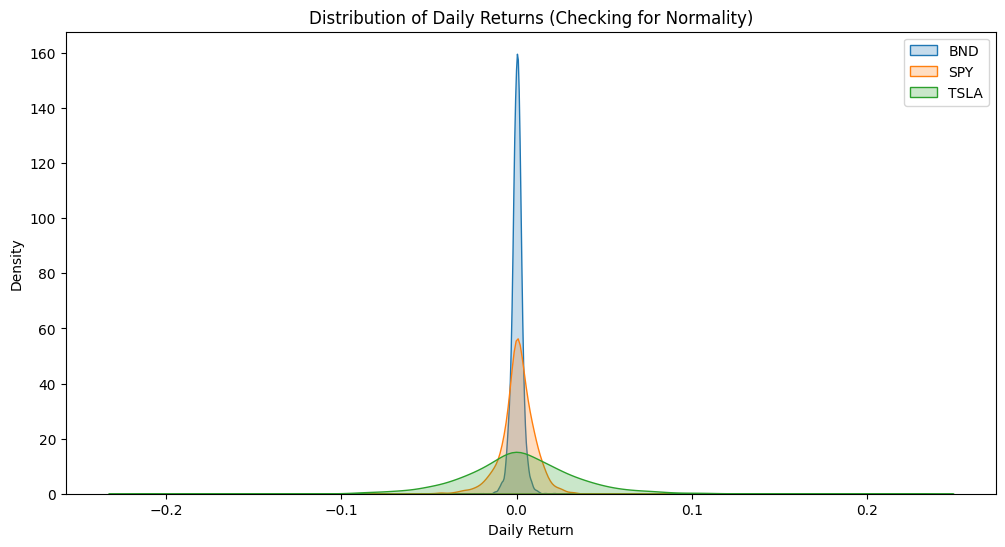

In [ ]:
plt.figure(figsize=(12, 6))
for ticker in returns.columns:
    sns.kdeplot(returns[ticker], label=ticker, fill=True)

plt.title('Distribution of Daily Returns (Checking for Normality)')
plt.xlabel('Daily Return')
plt.ylabel('Density')
plt.legend()
plt.show()

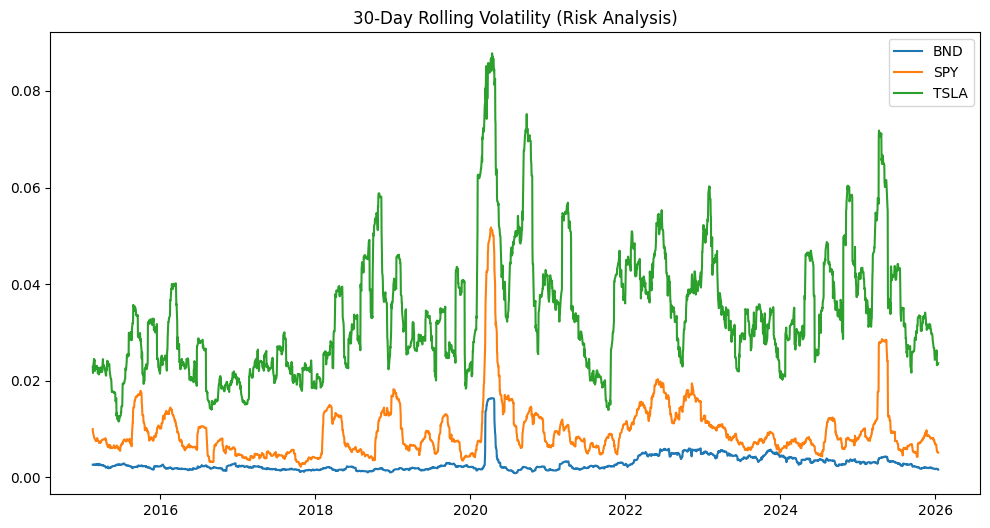

In [12]:
volatility = returns.rolling(window=30).std()

plt.figure(figsize=(12, 6))
plt.plot(volatility)
plt.title('30-Day Rolling Volatility (Risk Analysis)')
plt.legend(volatility.columns)
plt.show()

Plotting Daily Percentage Change to Observe Volatility

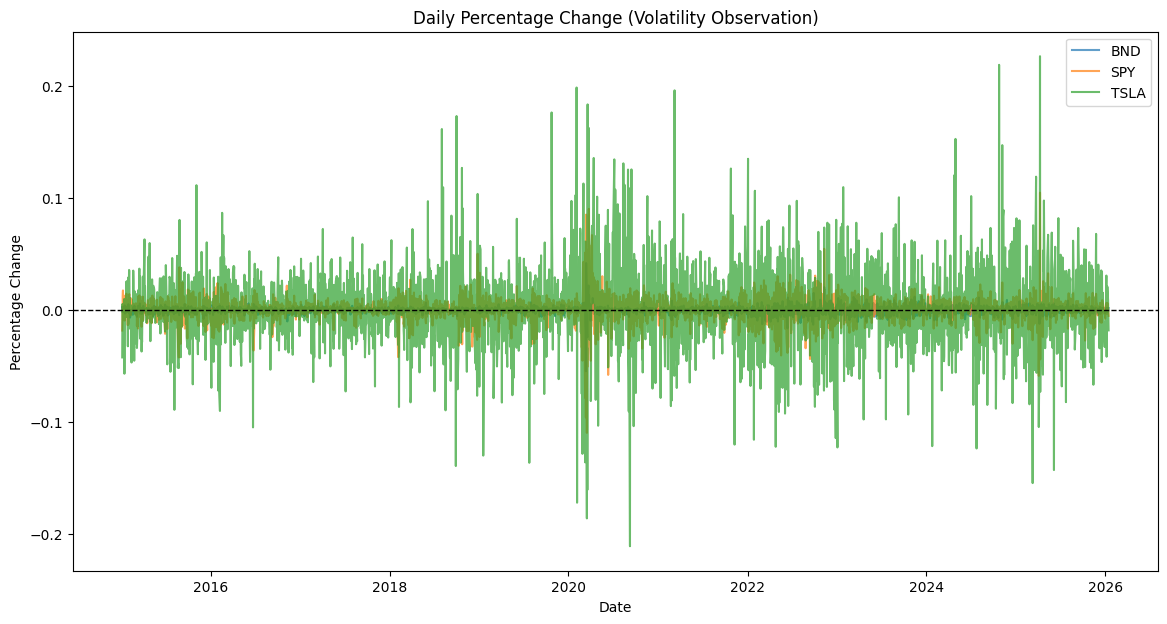

In [ ]:
daily_returns = df.pct_change().dropna()
plt.figure(figsize=(14, 7))
for ticker in daily_returns.columns:
    plt.plot(daily_returns.index, daily_returns[ticker], label=ticker, alpha=0.7)

plt.axhline(0, color='black', lw=1, linestyle='--')
plt.title('Daily Percentage Change (Volatility Observation)')
plt.ylabel('Percentage Change')
plt.xlabel('Date')
plt.legend()
plt.show()

Rolling Statistics for Trend and Volatility Analysis

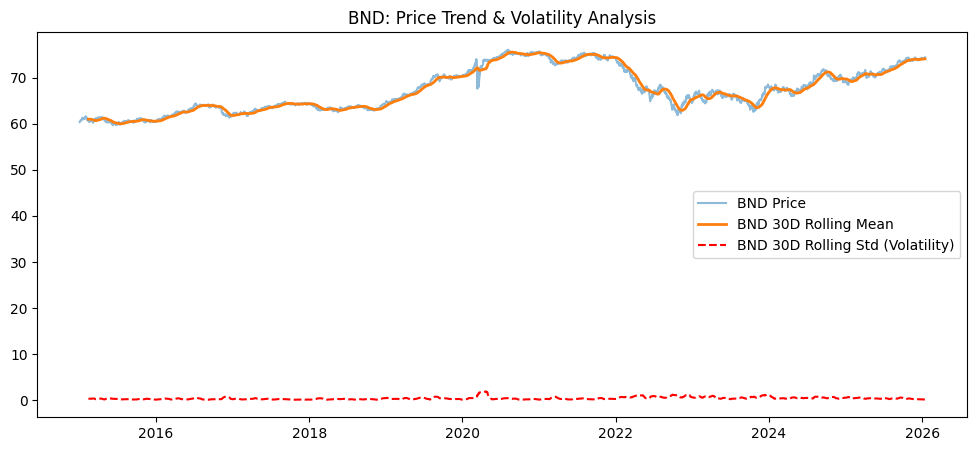

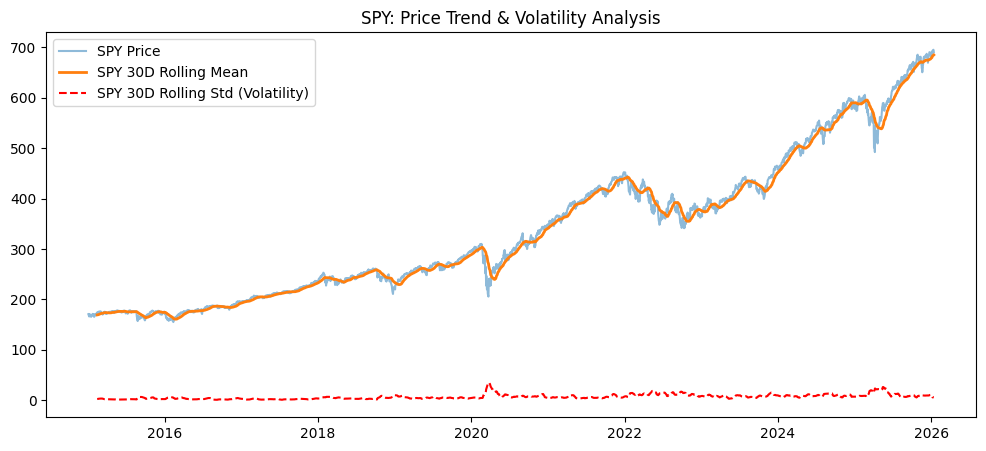

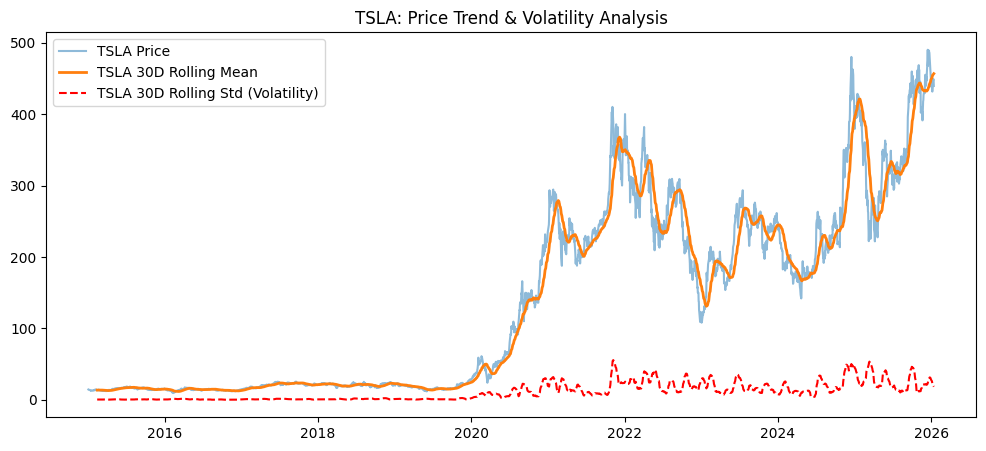

In [13]:
window = 30

for ticker in df.columns:
    plt.figure(figsize=(12, 5))
    rolling_mean = df[ticker].rolling(window=window).mean()
    rolling_std = df[ticker].rolling(window=window).std()
    plt.plot(df[ticker], label=f'{ticker} Price', alpha=0.5)
    plt.plot(rolling_mean, label=f'{ticker} {window}D Rolling Mean', linewidth=2)
    plt.plot(rolling_std, label=f'{ticker} {window}D Rolling Std (Volatility)', color='red', linestyle='--')
    
    plt.title(f'{ticker}: Price Trend & Volatility Analysis')
    plt.legend()
    plt.show()

## 4.Seasonality and Trend Analysis

Statistical Test (ADF) on Prices AND Daily Returns

In [ ]:
def run_adf_test(series, name):
    result = adfuller(series.dropna())
    print(f'--- ADF Test: {name} ---')
    print(f'ADF Statistic: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    if result[1] <= 0.05:
        print("Result: Stationary (Reject Null Hypothesis)\n")
    else:
        print("Result: Non-Stationary (Fail to Reject Null Hypothesis)\n")

print("STATISTICAL TEST ON CLOSING PRICES:")
for ticker in df.columns:
    run_adf_test(df[ticker], f"{ticker} Price")

print("STATISTICAL TEST ON DAILY RETURNS:")
for ticker in daily_returns.columns:
    run_adf_test(daily_returns[ticker], f"{ticker} Daily Return")

STATISTICAL TEST ON CLOSING PRICES:
--- ADF Test: BND Price ---
ADF Statistic: -1.0514
p-value: 0.7341
Result: Non-Stationary (Fail to Reject Null Hypothesis)

--- ADF Test: SPY Price ---
ADF Statistic: 1.1709
p-value: 0.9958
Result: Non-Stationary (Fail to Reject Null Hypothesis)

--- ADF Test: TSLA Price ---
ADF Statistic: -0.7802
p-value: 0.8249
Result: Non-Stationary (Fail to Reject Null Hypothesis)

STATISTICAL TEST ON DAILY RETURNS:
--- ADF Test: BND Daily Return ---
ADF Statistic: -10.4338
p-value: 0.0000
Result: Stationary (Reject Null Hypothesis)

--- ADF Test: SPY Daily Return ---
ADF Statistic: -17.2288
p-value: 0.0000
Result: Stationary (Reject Null Hypothesis)

--- ADF Test: TSLA Daily Return ---
ADF Statistic: -53.0196
p-value: 0.0000
Result: Stationary (Reject Null Hypothesis)



Statistical Summary

In [20]:
print("The Augmented Dickey-Fuller (ADF) test proved that the raw price series \nfor TSLA, BND, and SPY are non-stationary,\nmeaning they exhibit time-dependent trends. However, the daily returns are stationary.\nThe ADF test confirmed that the raw price series is non-stationary. \nConsequently, I will apply a first-order differencing (d=1) or use daily percentage returns in \nTask 2 to ensure the data meets the stationarity prerequisite for ARIMA and LSTM modeling.")

The Augmented Dickey-Fuller (ADF) test proved that the raw price series 
for TSLA, BND, and SPY are non-stationary,
meaning they exhibit time-dependent trends. However, the daily returns are stationary.
The ADF test confirmed that the raw price series is non-stationary. 
Consequently, I will apply a first-order differencing (d=1) or use daily percentage returns in 
Task 2 to ensure the data meets the stationarity prerequisite for ARIMA and LSTM modeling.


## 5.Calculate Risk Metrics

In [ ]:
annual_factor = np.sqrt(252)
sharpe_ratios = (daily_returns.mean() / daily_returns.std()) * annual_factor
var_95 = daily_returns.quantile(0.05)

print("Foundational Risk Metrics")
for ticker in daily_returns.columns:
    print(f"\nAsset: {ticker}")
    print(f"  Annualized Sharpe Ratio: {sharpe_ratios[ticker]:.4f}")
    print(f"  Value at Risk (95%): {var_95[ticker]:.4f}")

Foundational Risk Metrics

Asset: BND
  Annualized Sharpe Ratio: 0.3815
  Value at Risk (95%): -0.0048

Asset: SPY
  Annualized Sharpe Ratio: 0.8040
  Value at Risk (95%): -0.0167

Asset: TSLA
  Annualized Sharpe Ratio: 0.8232
  Value at Risk (95%): -0.0525


### Task 1: Final Insights & Documentation
1. Overall Direction of Tesla (TSLA) Stock Price
Long-term Trend: Based on the historical price plot, Tesla exhibits a strong upward trajectory over the long term.

### 2. Analysis of Fluctuations in Daily Returns
High Volatility: Tesla's daily percentage changes show much larger "spikes" compared to SPY and BND, indicating it is the highest-risk asset in this portfolio.

Anomaly Clustering: Significant fluctuations often appear in "clusters," where a period of high volatility is followed by further extreme moves.

Risk Comparison: The calculated Value at Risk (VaR) for TSLA is significantly higher (more negative) than for the other assets, proving that its daily fluctuations can lead to substantial single-day losses.